In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15, 8))

In [49]:
dados = pd.read_csv('dados/aluguel.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [50]:
area = plt.figure()

<Figure size 1080x576 with 0 Axes>

In [51]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [52]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor x Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo_g4 = dados.groupby('Tipo')['Valor']
labels_g4 = grupo_g4.mean().index
valores_g4 = grupo_g4.mean()
g4.bar(labels_g4, valores_g4)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

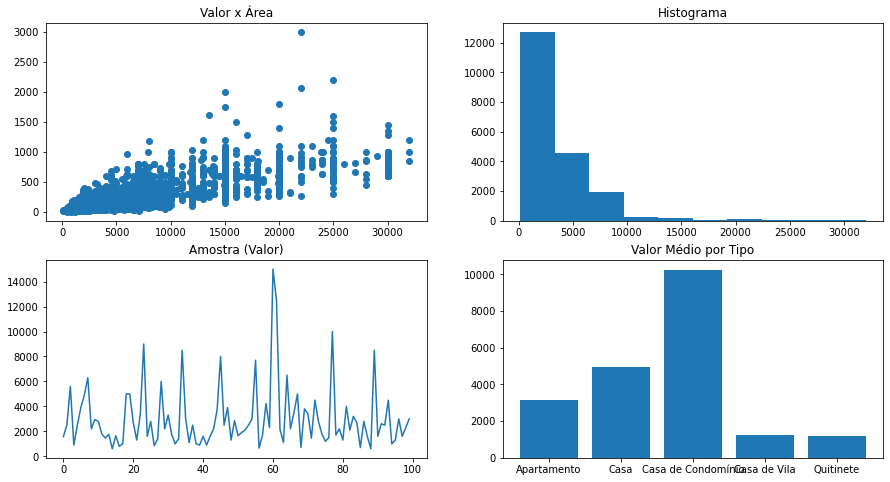

In [53]:
area

In [54]:
area.savefig('grafico.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

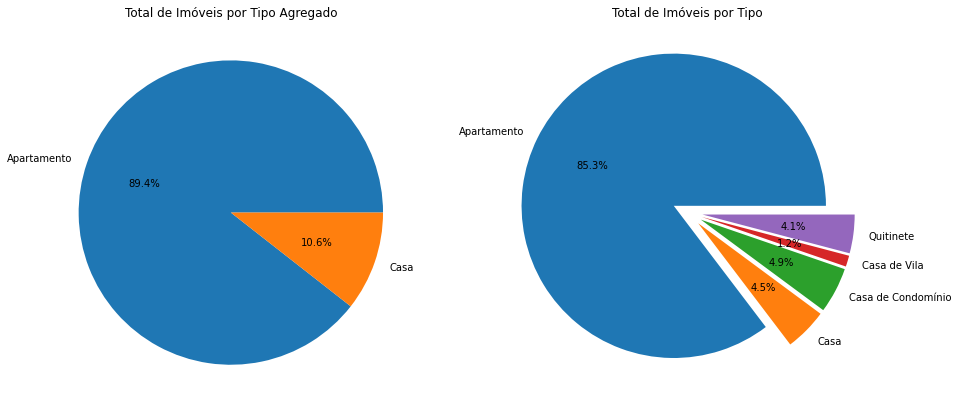

In [55]:
area_pizza = plt.figure()
g1_pizza = area_pizza.add_subplot(1, 2, 1)
g2_pizza = area_pizza.add_subplot(1, 2, 2)

grupo_pizza_1 = dados.groupby('Tipo Agregado')['Valor']
labels_pizza_1 = grupo_pizza_1.count().index
valores_pizza_1 = grupo_pizza_1.count().values
g1_pizza.pie(valores_pizza_1, labels = labels_pizza_1, autopct='%1.1f%%')
g1_pizza.set_title('Total de Imóveis por Tipo Agregado')

grupo_pizza_2 = dados.groupby('Tipo')['Valor']
labels_pizza_2 = grupo_pizza_2.count().index
valores_pizza_2 = grupo_pizza_2.count().values
g2_pizza.pie(valores_pizza_2, labels = labels_pizza_2, autopct='%1.1f%%', explode=(.1, .1, .1, .1, .1))
g2_pizza.set_title('Total de Imóveis por Tipo')

In [56]:
area_pizza.savefig('grafico_pizza.png', dpi=300, bbox_inches='tight')